In [1]:
import sys
import os
sys.path.insert(0,'..')
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torch.nn.init as init
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from maxpool import *
from relu import *
from data_utils import *
from models import *
%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

def plot_max_values(kernel_size, stride, matrix):
    # Retrieve the maximum value of each region
    max_per_region = torch.nn.functional.max_pool2d(matrix, kernel_size=kernel_size, stride=stride).squeeze()

    # Store the indices of the maximum values in each region
    max_indices = []
    region_size = kernel_size
    for row in range(max_per_region.shape[0]):
        for col in range(max_per_region.shape[1]):
            max_val = max_per_region[row, col].item()
            region_indices = ((row * region_size, col * region_size), ((row + 1) * region_size - 1, (col + 1) * region_size - 1))
            max_region_indices = [(x, y) for x in range(region_indices[0][0], region_indices[1][0] + 1)
                                  for y in range(region_indices[0][1], region_indices[1][1] + 1)
                                  if matrix[0, 0, x, y].item() == max_val]
            if len(max_region_indices) > 1:
                max_indices.extend(max_region_indices)
    
    # Display the matrix with the points equal to the maximum in each region shown in red
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.matshow(matrix[0, 0].detach().cpu().to(torch.float32))  # Adjust the colormap
    for idx in max_indices:
        ax.scatter(idx[1], idx[0], s=20, c='red', cmap='jet')  # Increase the scatter point size

    # Add a color bar
    plt.show()


In [3]:
## Initialize random seed
np.random.seed(42)
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    cudnn.benchmark = False
    # Deterministic convolutions
    torch.backends.cudnn.deterministic = True

In [4]:
batch_size = 1
transform = transforms.Compose([
        transforms.ToTensor()
        ])
traindata = datasets.MNIST(root=data_dir, train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=batch_size)

#### Illustration 32 bits

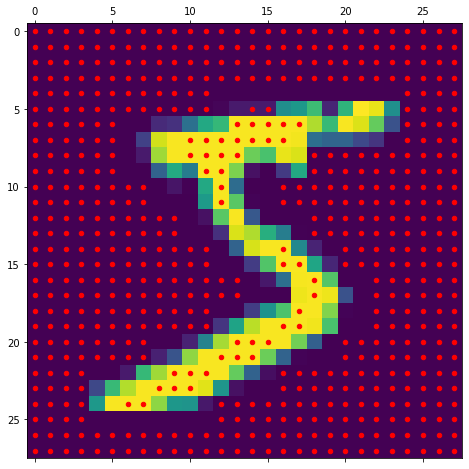

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
model = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(1, 1, 5)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(2, 2)),
            ('flat', nn.Flatten()),
            ('linear2', nn.Linear(12 * 12 * 1, 10))])).to(device)
images = images.to(device)
plot_max_values(2, 2, model.relu1(images))